# Hotel Cancellation Prediction

## Exploratory Data Analysis:


Goal: Explore the data relationships of all your features and understand how the
features compare to the response variable.

* Build data profiles and tables 
    * Inference statistics
* Explore data relationships
    * Data visulization
* Feature Selection and Engineering

In [1]:
# import necessary packages and load dataset

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [2]:
df = pd.read_csv('../data/hotel_data_cleaned.csv')

In [3]:
df.head()

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,2,Resort Hotel,0,7,27,0,1,1,0.0,0,...,No Deposit,not third party,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
1,3,Resort Hotel,0,13,27,0,1,1,0.0,0,...,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
2,4,Resort Hotel,0,14,27,0,2,2,0.0,0,...,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01
3,5,Resort Hotel,0,14,27,0,2,2,0.0,0,...,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01
4,6,Resort Hotel,0,0,27,0,2,2,0.0,0,...,No Deposit,not third party,0,Transient,107.0,0,0,Check-Out,2015-07-03,2015-07-01


In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117430 entries, 0 to 117429
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      117430 non-null  int64  
 1   hotel                           117430 non-null  object 
 2   is_canceled                     117430 non-null  int64  
 3   lead_time                       117430 non-null  int64  
 4   arrival_date_week_number        117430 non-null  int64  
 5   stays_in_weekend_nights         117430 non-null  int64  
 6   stays_in_week_nights            117430 non-null  int64  
 7   adults                          117430 non-null  int64  
 8   children                        117426 non-null  float64
 9   babies                          117430 non-null  int64  
 10  meal                            117430 non-null  object 
 11  country                         117430 non-null  object 
 12  market_segment  

In [5]:
df=df.drop(columns ='Unnamed: 0')

In [6]:
# Descriptive Statistics 

df.describe()

,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,117430.000000,117430.000000,117430.000000,117430.000000,117430.000000,117430.000000,117426.000000,117430.000000,117430.000000,117430.000000,117430.000000,117430.000000,117430.000000,117430.000000,117430.000000,117430.000000
mean,0.374776,105.085702,27.136754,0.936456,2.521264,1.860632,0.104508,0.007869,0.027880,0.086954,0.125351,0.216495,2.337937,103.484779,0.062642,0.571038
std,0.484067,106.907138,13.575709,0.995796,1.893764,0.482102,0.399696,0.097168,0.164631,0.848690,1.446214,0.633205,17.677053,46.708941,0.245565,0.791655
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,19.000000,16.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.530000,0.000000,0.000000
50%,0.000000,71.000000,27.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,162.000000,38.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,709.000000,53.000000,19.000000,50.000000,4.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,391.000000,510.000000,8.000000,5.000000


## Data Visualization

<AxesSubplot:>

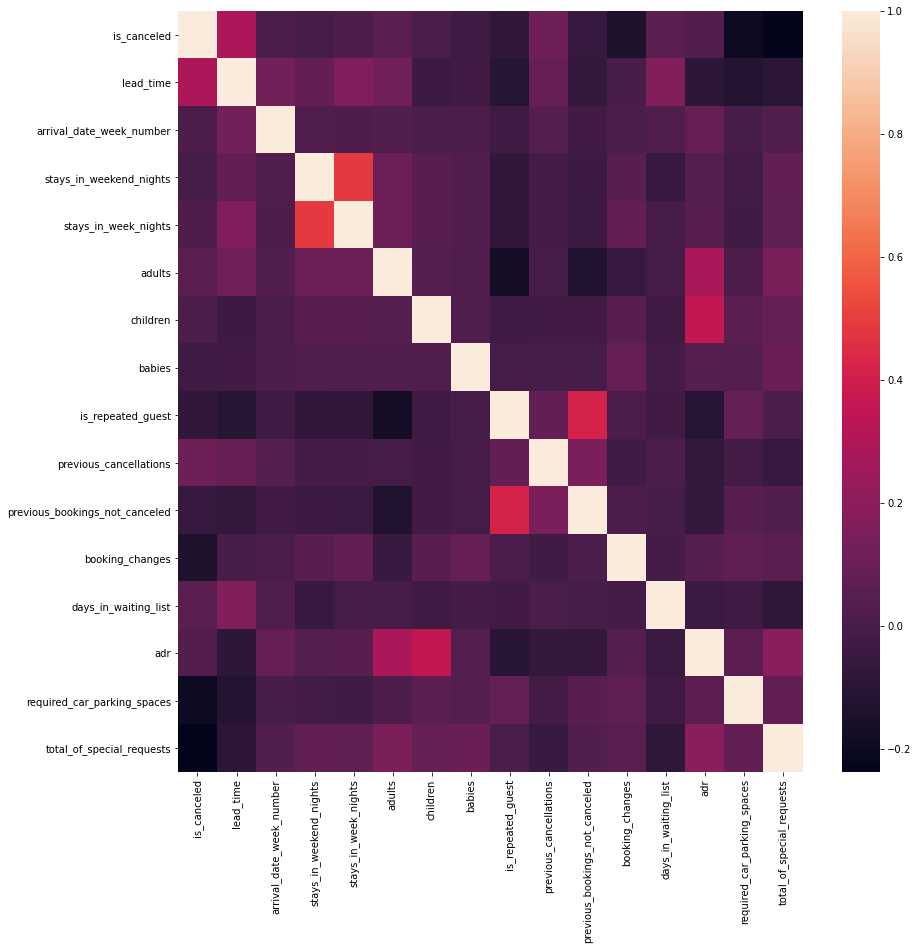

In [7]:
# heatmap
plt.figure(figsize = (14,14))
sns.heatmap(df.corr())

In [8]:
df_corr = df.corr()

In [9]:
(df_corr['adr']).sort_values(ascending = False)

adr                               1.000000
children                          0.353152
adults                            0.285106
total_of_special_requests         0.191294
arrival_date_week_number          0.089215
required_car_parking_spaces       0.061355
stays_in_week_nights              0.048567
booking_changes                   0.037216
stays_in_weekend_nights           0.035640
babies                            0.034102
is_canceled                       0.030951
days_in_waiting_list             -0.046598
previous_bookings_not_canceled   -0.064081
previous_cancellations           -0.071310
lead_time                        -0.090983
is_repeated_guest                -0.103289
Name: adr, dtype: float64

ADR has high correlation with children, adults, total_of_special_requests. Having more people (adults and children) and special orders increases daily rate. 

In [10]:
# Split the df by cancallation

df_c0 = df[df['is_canceled']==0]['adr'] # not canceled
df_c1 = df[df['is_canceled']==1]['adr'] # canceled

In [11]:
# count booking cancelled 

print('No cancellation reservation:', len(df_c0))
print('Cancellation reservation:', len(df_c1))

# percentage of booking cancelled
print ((len(df_c1)/len(df.adr))*100)

No cancellation reservation: 73420
Cancellation reservation: 44010
37.4776462573448


<AxesSubplot:xlabel='is_canceled', ylabel='count'>

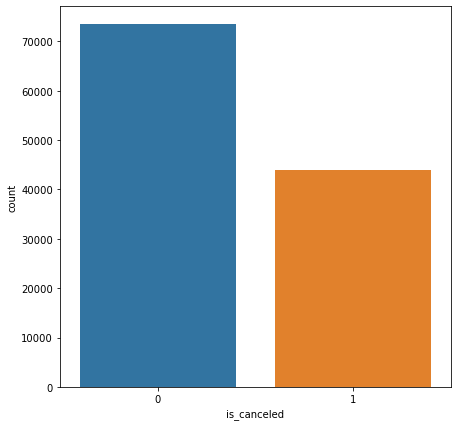

In [12]:
# Bar plot showing the number of cancelled vs not cancelled reservations

plt.figure(figsize = (7,7))
sns.countplot(x ='is_canceled', data = df)


## Statistics Inference 

**Null Hypothesis**: The average daily rate price (ADR) booked by who has cancelled the reservation has the same rate as people who is not cancelled.

**Alternative Hypothesis**: The average daily rate price (ADR) booked by who has cancelled the reservation does NOt have the same rate as people who is not cancelled.

Text(0, 0.5, 'counts')

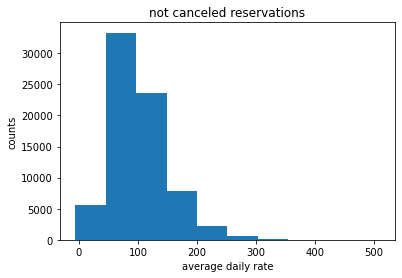

In [13]:
# not canceled average daily rate (price) histogram

plt.hist(df_c0)

plt.title ('not canceled reservations')
plt.xlabel ('average daily rate')
plt.ylabel ('counts')

Text(0, 0.5, 'counts')

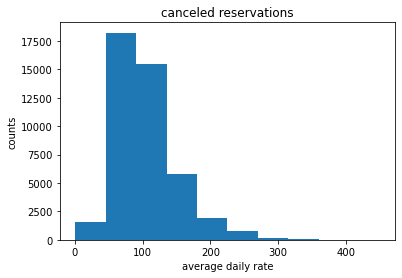

In [14]:
# canceled average daily rate (price) histogram

plt.hist(df_c1)

plt.title ('canceled reservations')
plt.xlabel ('average daily rate')
plt.ylabel ('counts')

compute variance of two sample for adr , whether they are equal or not, if equal set to True , False otherwise



In [15]:
# Checking variances of two samples whether they are equal or not.

s0 = np.var(df_c0)
s1 = np.var(df_c1)

print('not canceled reservation sample variance:', s0)
print('canceled reservation sample variance:', s1)
print('The variances between two samples are not equal, therefore equal_var = False')

not canceled reservation sample variance: 2235.3979448409814
canceled reservation sample variance: 2086.558956823997
The variances between two samples are not equal, therefore equal_var = False


In [16]:
ttest_ind(df_c1, df_c0, equal_var=False)

Ttest_indResult(statistic=10.703145535100406, pvalue=1.0189002913869198e-26)

The p-value is lower than 0.05 (standard alpha value, significance level). Therefore, we can reject the null hypothesis and accept alternative hypothesis. 
**The average daily rate (ADR) between two groups (who has cancelled and not cancelled the reservation) are different.**

## Bootstrapping

The shape of histogram follows normal distribution trends however, they are slightly skewed to the right. I am going to use bootstrapping method to check my t-test results.

**Null Hypothesis**: The average daily rate price (ADR) booked by who has cancelled the reservation has the same rate as people who is not cancelled.

**Alternative Hypothesis**: The average daily rate price (ADR) booked by who has cancelled the reservation does NOt have the same rate as people who is not cancelled.

In [17]:
difference = list()

# Now make a for loop that does the following 10,000 times:
# 1. makes a permutation of the 'Rating' as you did above
# 2. calculates the difference in the mean rating for apple and the mean rating for google. 
for i in range(10000):
    permutation = np.random.permutation(df['adr'])
    difference.append(np.mean(permutation[df['is_canceled']==0]) - np.mean(permutation[df['is_canceled']==1]))

In [18]:
empirical_diff = abs(np.mean(df_c0)-np.mean(df_c1))

In [23]:
positiveExtremes = []
negativeExtremes = []
for i in range(len(difference)):
    if (difference[i] >= empirical_diff):
        positiveExtremes.append(difference[i])
    elif (difference[i] <= -empirical_diff):
        negativeExtremes.append(difference[i])

print(len(positiveExtremes))
print(len(negativeExtremes))

p = (len(positiveExtremes)+len(negativeExtremes))/len(difference)

print (p)

0
0
0.0


P value = 0, very significant evidence that the prices are different between two groups.